# 1. Описание

Мы предлагаем решить две задачи:
 1. Определить есть ли в объявлении контактная информация 
 2. Найти положение контактной информации в описании объявлении

Первая задача обязательная. Вторая - со звездочкой, можете решить ее если останется время или желание :)

## 1.1 Датасет
Для обучения и инференса обоих задач у вас есть следующие поля:
* `title` - заголовок,
* `description` - описание,
* `subcategory` - подкатегория,
* `category` - категория,
* `price` - цена,
* `region` - регион,
* `city` - город,
* `datetime_submitted` - дата размещения.

Таргет первой задачи: `is_bad`. Для второй разметка не предоставляется.

Есть два датасета: `train.csv` и `val.csv`. 
В датасетах могут встречаться (как и, к сожалению, в любых размечаемых данных) некорректные метки.

`train.csv` содержит больше данных, однако разметка в нём менее точная.

В `val.csv` существенно меньше данных, но более точная разметка.

Тестовый датасет, на котором мы оценим решение, будет больше похож на `val.csv`.

`val.csv` находится в папке `./data`. 
`train.csv` можно качать скриптом `./data/get_train_data.sh` или перейдя по 
[ссылке](https://drive.google.com/file/d/1LpjC4pNCUH51U_QuEA-I1oY6dYjfb7AL/view?usp=sharing) 

## 1.2 Задача 1
В первой задаче необходимо оценить вероятность наличия в объявлении контактной информации. 
Результатом работы модели является `pd.DataFrame` с колонками:
* `index`: `int`, положение записи в файле;
* `prediction`: `float` от 0 до 1.

Пример:

|index  |prediction|
|-------|----------|
|0|0.12|
|1|0.95|
|...|...|
|N|0.68|

В качестве метрики качества работы вашей модели мы будем использовать усредненный `ROC-AUC` по каждой категории объявлений.

## 1.3 Задача 2

Во второй задаче необходимо предсказать начало и конец контактной информации в описании (`description`) объявления. 
Например:
* для строки `Звоните на +7-888-888-88-88, в объявлении некорректный номер`: (11, 26),
* для строки `Звоните на +7-888aaaaa888aaaa88a88, в объявлении некорректный номер`: (11, 33),
* для строки `мой tg: @ivanicki_i на звонки не отвечаю`: (8, 18),
* для строки `мой tg: ivanicki_i на звонки не отвечаю`: (8, 17),
* если в описании объявления (поле `description`) контактов нет, то (None, None)
* если в описании объявления (поле `description`) более одного контакта (`Звоните не 89990000000 или на 89991111111`), то (None, None).

Результатом работы модели является `pd.DataFrame` с колонками:
* `index`: `int`, положение записи в файле;
* `start`: `int` or `None`, начало маски контакта;
* `finish`: `int` or `None`, конец маски контакта.\
(`start` < `finish`)
  
Пример:

|index  |start|finish|
|-------|----------|-----|
|0|None|None|
|1|0|23
|2|31|123
|...|...|
|N|None|None


Для этой задачи метрикой будет усредненный IoU (`Intersection over Union`) по текстам объявлений.

# 2. Запуск решения

Ваш код для обучения и инференса моделей должен располагаться в папке `./lib`. 

Чтобы мы могли проверить ваше решение необходимо изменить метод `process` класса `Test` в файле `./lib/run.py`. 

В нем происходит инференс вашей модели на тестовых данных. 

Метод должен возвращать два датафрейма с ответами к задачам 1 и 2 соответственно.

Вы можете получить доступ к валидационным, трейновым (если файл скачан) и тестовым данным с помощью методов 'val', 'train' и 'test'.


Для того чтобы было легче разобраться как происходит запуск моделей мы подготовили константные 
"модели" (`./lib/model.py`), которые примеряются в `./lib/run.py` для формирования финального ответа.

Форматы тестового файла (в нем будет отсутствовать стобец `is_bad`), ответов зачач 1 и 2 приведены выше. 
После прогона будут запущены минимальные чекеры на соответствие ответов описанному формату

Решение будет проверяться в автоматическом режиме. 
Перед отправкой решения вам необходимо убедиться что все работает корректно запустив команду 
`docker-compose -f docker-compose.yaml up` в корне данного репозитория. 
Весь локальный код репозитория мапится в папку `/app` контейнера, локальная папка `./data` мапится в `/data` контейнера.
После этого запускается команда `python lib/run.py --debug`.
Чтобы все заработало у вас в системе должны быть установлены `docker` и `docker-compose`.

Вы можете добавить нужные библиотеки в файл `requirements.txt` или напрямую в `Dockerfile`.

Во время инференса моделей у контейнера не будет доступа в интернет. 

Обратите внимание, что в контейнере по умолчанию используется python3.8.

# 3. Ресурсы

Ресурсы контейнера:
* 4 Гб оперативной памяти
* 2 ядра CPU
* 1 GPU, 2 Гб памяти

Ограничение на время работы:
* 60 000 объектов должны обрабатываться не более 180 минут для предсохраненной модели на CPU и 30 минут на GPU.

**Важно, чтобы всё, что нужно для запуска run.py, было в репозитории.**\
Часто решающие предлагают перед запуском вручную скачать архив с весами модели, в таком случае нужно чтобы веса скачивались и распаковывались при сборке контейнера либо обучение происходило в пайплайне.

# 4. Как сдать решение
- Убедиться, что команда `docker-compose -f docker-compose.yaml up` работает корректно.
- Закоммитить код для обучения и инференса модели в master
- Открыть issue в своем репозитории и добавить учетку avito-ds (https://github.com/avito-ds) в Assignes. Если это не первая попытка, то можно переоткрыть старый issue, все так же добавив avito-ds в качестве assignee. 
- Предупредить рекрутера Авито/контакта из кадрового агентства о том, что ты выложил финальный результат и прислать ссылку на issue!

Удачи :)

# 5. Как задать вопрос
Создать issue с вопросом и добавить учетку avito-ds в качестве assignee.

# 6. FAQ.
**Веса моей модели весят много, могу ли я добавить веса через git LFS?**

Через git LFS нет, но есть workaround. В git можно свободно коммитить файлы до 100 мб. Для файлов большего размера должна применяться git LFS, причем для 
форкнутых репозиториев применяется квота avito-ds. Текущая квота не достаточна для этих целей. В качестве workaround
можно добавить команду или скрипт на скачивание весов из облака в Dockerfile. 

# Baseline

Текущий бэйзлайн, который надо побить для первой части - 0.92.
​


In [3]:
!ls

Dockerfile  Untitled.ipynb  docker-compose.yaml  requirements.txt
README.md   data	    lib


In [4]:
!ls data

get_train_data.sh  train.csv  val.csv


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('data/train.csv')
val = pd.read_csv('data/val.csv')

In [5]:
auxillary_features = ['description', 'title', 'datetime_submitted', 'is_bad', 'price']

num_features = ['price']

cat_features = train.columns._data[~train._mgr.items.isin(auxillary_features)].tolist()

text_features = ['sign']

target = ['is_bad']

In [75]:
pd_data = train.copy()
pd_data[text_features[0]] = pd_data['title'] + ' ' + pd_data['description']

pd_val_data = val.copy() 
pd_val_data[text_features[0]] = val['title'] + ' ' +  val['description']

In [76]:
X_train = pd_data[cat_features + text_features + num_features].copy()
y_train = pd_data[target].copy()

X_val = pd_val_data[cat_features + text_features + num_features].copy()
y_val = pd_val_data[target].copy()

In [10]:
import matplotlib.pyplot as plt

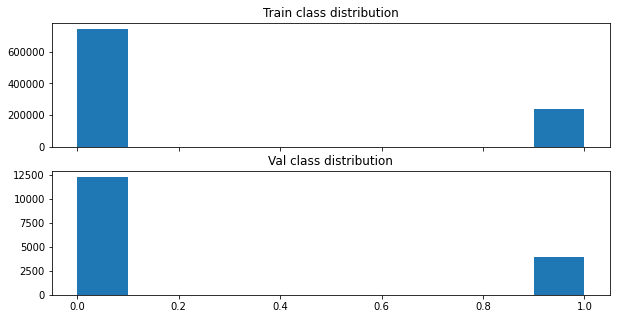

In [77]:
_, axes = plt.subplots(figsize=(10, 5), nrows=2, sharex=True)

axes[0].hist(y_train)
axes[0].set_title('Train class distribution')

axes[1].hist(y_val)
axes[1].set_title('Val class distribution')

plt.show()

This is the exact cause we should use weighted roc-auc

## Data filtering

In [41]:
import nltk
nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from pymystem3 import Mystem
from pandarallel import pandarallel
from functools import partial

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
pandarallel.initialize(progress_bar=False, use_memory_fs=False)

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [79]:
def precrocess_data(row, stopwords_list, punctuation_list, stem_obj):
    
    tokens = mystem.lemmatize(row.lower())
    
    row = ' '.join([
        text for text in tokens if text not in stopwords_list \
        and text != ' ' \
        and text.strip() not in punctuation
    ])

    return row

prep_data_func = partial(precrocess_data, stopwords_list=russian_stopwords, punctuation_list=punctuation, stem_obj=mystem)

In [94]:
%%time

X_train_processed = X_train.copy()

print('Before:', int(X_train.memory_usage(deep=True).sum() / 2**20), 'megabytes')

X_train_processed.sign = X_train.sign.parallel_apply(prep_data_func)

print('After:', int(X_train_processed.memory_usage(deep=True).sum() / 2**20), 'megabytes')

Before: 2337 megabytes
After: 1392 megabytes
CPU times: user 9.18 s, sys: 14.5 s, total: 23.6 s
Wall time: 12min 18s


In [92]:
%%time

X_val_processed = X_val.copy()

print('Before:', int(X_val.memory_usage(deep=True).sum() / 2**20), 'megabytes')

X_val_processed.sign = X_val.sign.parallel_apply(prep_data_func)

print('After:', int(X_val_processed.memory_usage(deep=True).sum() / 2**20), 'megabytes')

Before: 51 megabytes
After: 30 megabytes
CPU times: user 257 ms, sys: 7.12 s, total: 7.38 s
Wall time: 30.5 s


## Regexps experiments

In [33]:
import re

def apply_regexps(X, regexps_list):
    res = X.sign

    for pattern, rep_string in regexps_list:
        pat = re.compile(pattern, re.I)

        res = re.sub(pat, rep_string, res)
    
    X.sign = res
    
    return X

In [19]:
regexps_list = [
    (r'([а-яё]*)[ ,.\-]*([а-яё]+)', ' '), # russian words with zero or more separators
#     (r'([a-z]{10,})', ' '), # english words with 10 or more characters
    (r'[\n;]', ' '), # new lines and strange separators
    (r'[ ]{2,}', ''), # sequences of 2 or more whitespaces
    (r' / ', ' '), # lonely slashes
    (r'[ \t,.!]*$', ''), # symbols in the end of line
    (r'^[ \t,.!]*', ''), # symbols in the beginning of line
]

In [20]:
def preprocess_with_regexps(X):
    return X.apply(lambda x: apply_regexps(x, regexps_list), axis=1)

In [34]:
%%time
X_train_processed = preprocess_with_regexps(X_train_processed)

CPU times: user 4min 28s, sys: 4.99 s, total: 4min 33s
Wall time: 4min 33s


In [35]:
%%time
X_val_processed = preprocess_with_regexps(X_val_processed)

CPU times: user 4.85 s, sys: 20.2 ms, total: 4.87 s
Wall time: 4.86 s


In [96]:
X_val_processed.to_csv('data/val_processed.csv') 

In [95]:
X_train_processed.to_csv('data/train_processed.csv') 